In [35]:
import tensorflow as tf

print(tf.__version__)

2.20.0


In [36]:
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [37]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [38]:
len(X_train)

60000

In [39]:
len(X_test)

10000

In [40]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [41]:
X_train[0].shape

(28, 28)

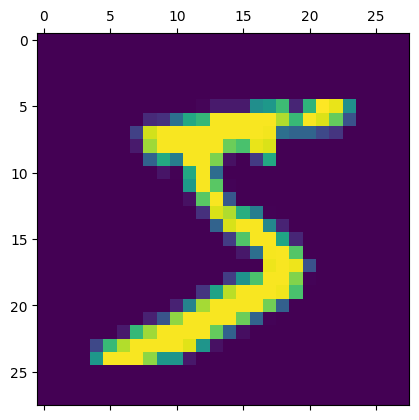

In [42]:
plt.matshow(X_train[0])

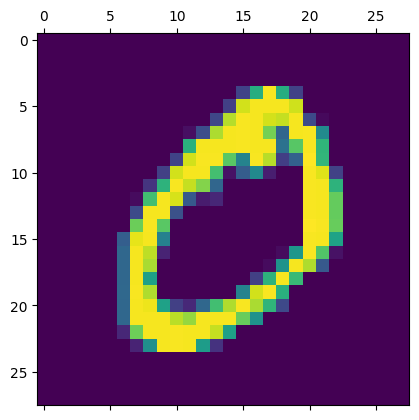

In [43]:
plt.matshow(X_train[1])

In [44]:
X_train = X_train / 255
X_test = X_test / 255

In [45]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)

In [46]:
model = keras.Sequential([
    keras.layers.Dense(10, activation='sigmoid', input_shape=(784,))
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5


C:\Users\Chanith Adikari\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 742us/step - accuracy: 0.8797 - loss: 0.4659
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 740us/step - accuracy: 0.9147 - loss: 0.3029
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 841us/step - accuracy: 0.9206 - loss: 0.2829
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 807us/step - accuracy: 0.9234 - loss: 0.2732
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 726us/step - accuracy: 0.9258 - loss: 0.2664


In [47]:
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 733us/step - accuracy: 0.9250 - loss: 0.2690 


[0.26899099349975586, 0.925000011920929]

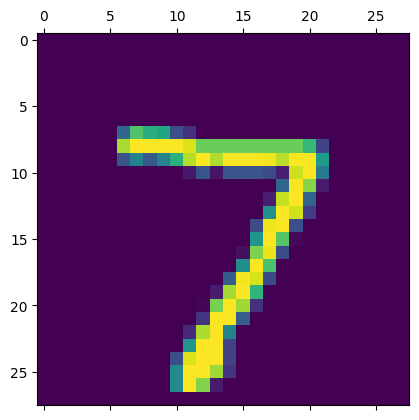

In [48]:
plt.matshow(X_test[0])

In [49]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 588us/step


array([2.1419035e-02, 4.2050561e-07, 5.5341803e-02, 9.5142609e-01,
       2.3105643e-03, 9.6671551e-02, 1.3046969e-06, 9.9966669e-01,
       9.1357403e-02, 5.5815989e-01], dtype=float32)

In [50]:
np.argmax(y_predicted[0])

np.int64(7)

In [51]:
y_predicted_labels = [int(np.argmax(i)) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [52]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [53]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 957,    0,    0,    2,    0,    5,   12,    2,    2,    0],
       [   0, 1114,    3,    2,    0,    1,    4,    2,    9,    0],
       [   5,    9,  921,   16,   10,    3,   13,   11,   42,    2],
       [   3,    0,   19,  910,    1,   28,    4,   10,   28,    7],
       [   1,    1,    2,    1,  934,    0,   12,    3,   11,   17],
       [   9,    3,    1,   27,   12,  773,   21,    5,   37,    4],
       [   7,    3,    4,    1,    7,    8,  925,    2,    1,    0],
       [   1,    5,   24,    6,   10,    0,    0,  949,    4,   29],
       [   5,    8,    6,   15,    9,   19,   10,   12,  886,    4],
       [  10,    7,    1,   11,   49,    7,    0,   30,   13,  881]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

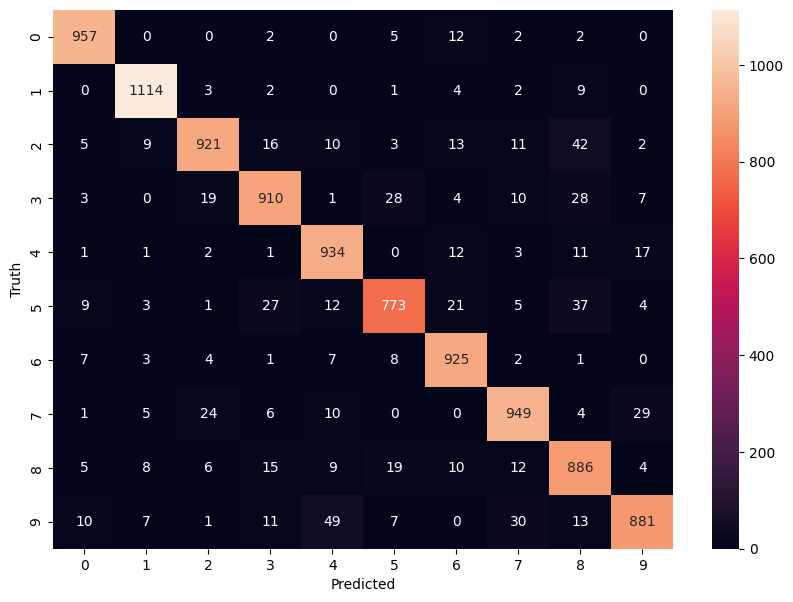

In [54]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [57]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,),activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9233 - loss: 0.2709
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9639 - loss: 0.1225
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9754 - loss: 0.0842
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9805 - loss: 0.0639
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9844 - loss: 0.0507


In [58]:
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 832us/step - accuracy: 0.9748 - loss: 0.0783 


[0.07825123518705368, 0.9747999906539917]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/step


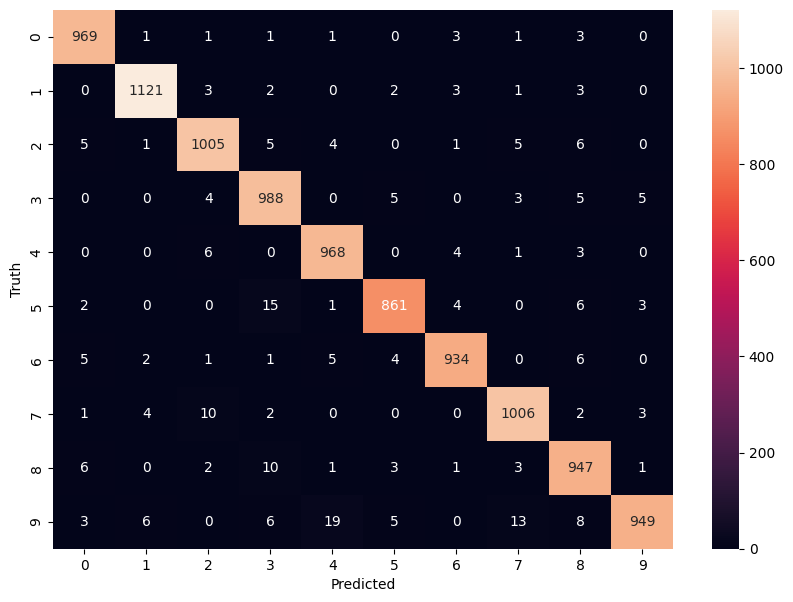

In [62]:
y_predicted = model.predict(X_test_flattened)

y_predicted_labels = [int(np.argmax(i)) for i in y_predicted]

cm = tf.math.confusion_matrix(
    labels=y_test,
    predictions=y_predicted_labels
).numpy()   

plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()